In [1]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt

In [2]:
# reading the data
data = pd.read_csv("bank-full.csv")
data

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


In [3]:
colmns = re.sub(";", " ", data.columns[0])
colmns = re.sub("\"", "", colmns)
colmns = colmns.split()

# cleaning each row of data 
def clean_data(row):
    row = re.sub(";", " ", row)
    row = re.sub("\"", "", row)
    row = row.split()
    return row

data1 = data.copy()
data1.iloc[:,0] = data1.iloc[:,0].map(lambda x: clean_data(x))
data1

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"[30, unemployed, married, primary, no, 1787, n..."
1,"[33, services, married, secondary, no, 4789, y..."
2,"[35, management, single, tertiary, no, 1350, y..."
3,"[30, management, married, tertiary, no, 1476, ..."
4,"[59, blue-collar, married, secondary, no, 0, y..."
...,...
4516,"[33, services, married, secondary, no, -333, y..."
4517,"[57, self-employed, married, tertiary, yes, -3..."
4518,"[57, technician, married, secondary, no, 295, ..."
4519,"[28, blue-collar, married, secondary, no, 1137..."


In [4]:
idx = 0
for row in data1.iloc[:,0]:
    if len(row) == 17:
        i = 0
        for col in colmns:
            data1.loc[idx,col] = row[i]
            i += 1
    idx += 1
    
data1.drop(data1.columns[0], axis=1, inplace=True)
df = data1.copy()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
convert_dtype = {"age":int, "balance":int, "day":int, "duration":int, "campaign":int, "pdays":int, "previous":int}
df = df.astype(convert_dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
categorical_cols = [col for col in df.columns if df[col].dtype == "O"]
numerical_cols = [col for col in df.columns if df[col].dtype != "O"]

df.loc[:,numerical_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


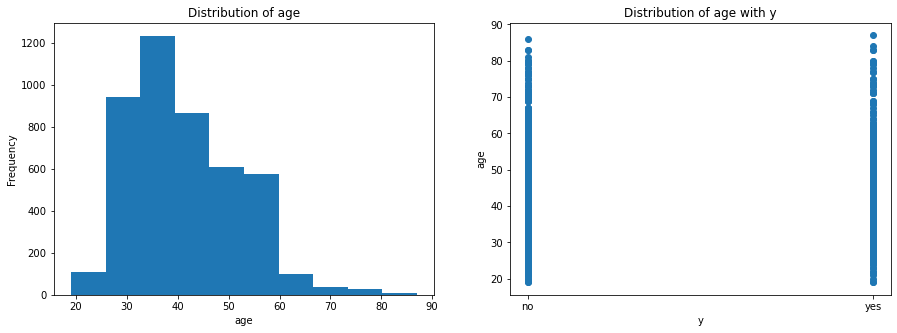

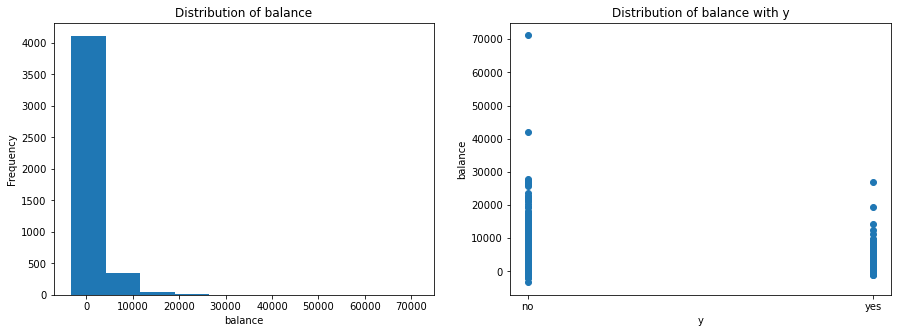

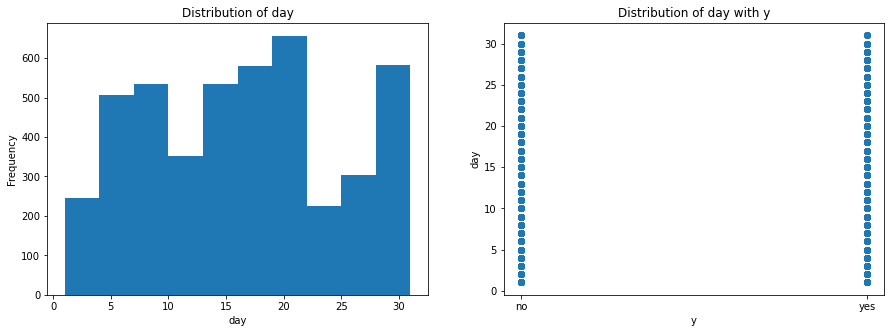

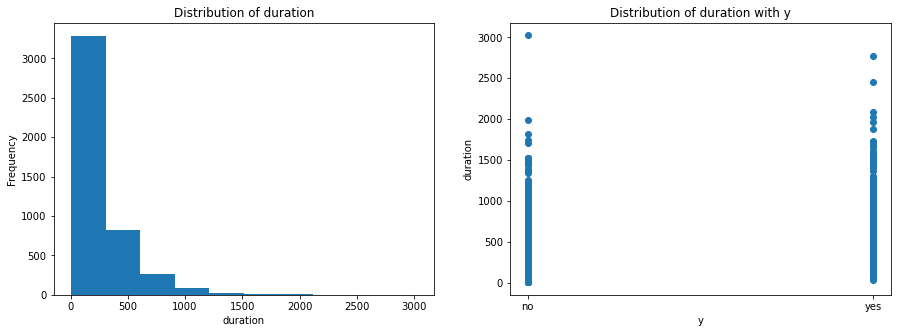

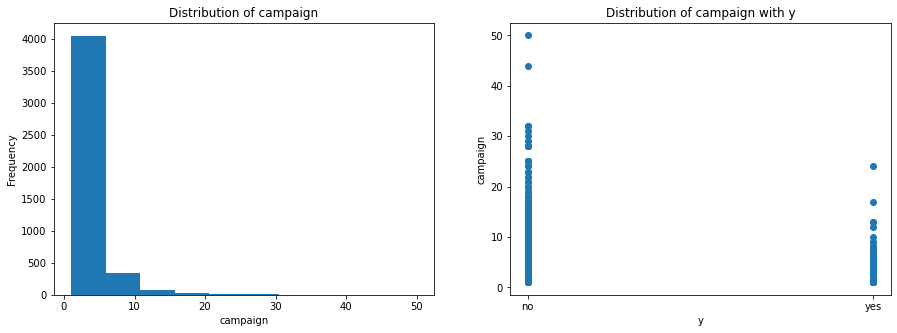

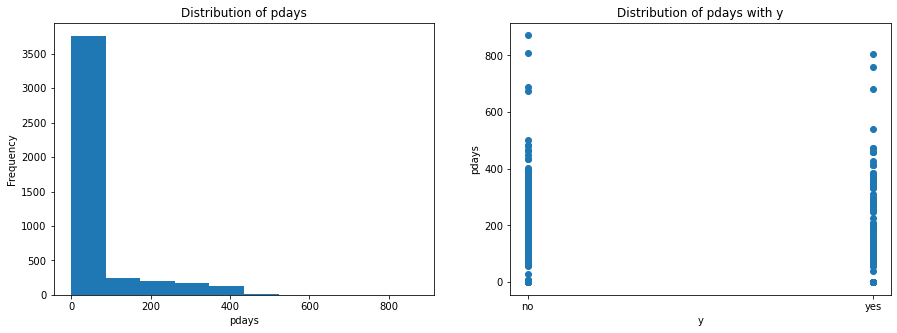

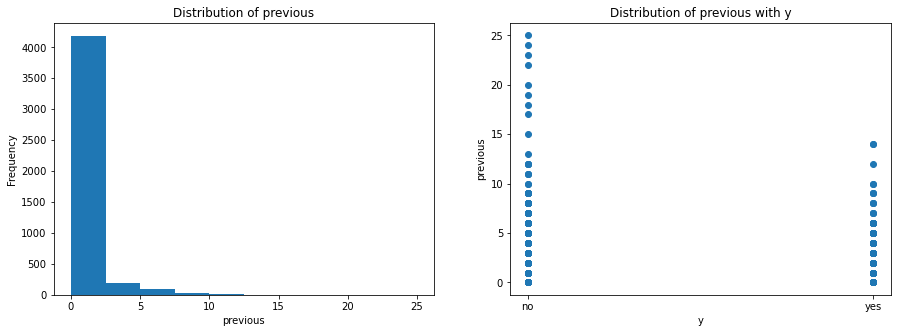

In [8]:
\for col in numerical_cols:
    plt.figure(figsize=(15,5))
    right = plt.subplot(1,2,1)
    plt.hist(df[col])
    right.set_ylabel("Frequency")
    right.set_xlabel(col)
    right.set_title(f"Distribution of {col}")
    left = plt.subplot(1,2,2)
    plt.scatter(df["y"],df[col])
    left.set_ylabel(col)
    left.set_xlabel("y")
    left.set_title(f"Distribution of {col} with y")
    plt.show()

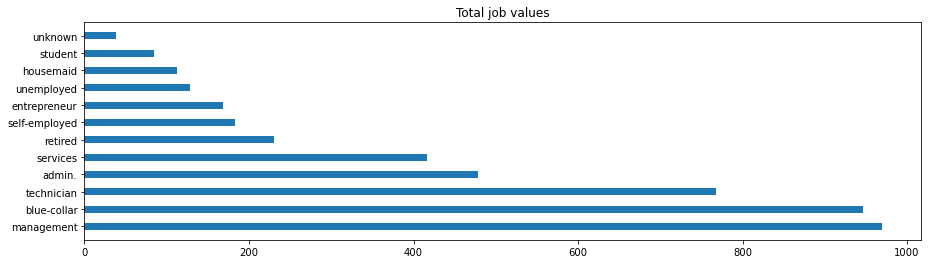

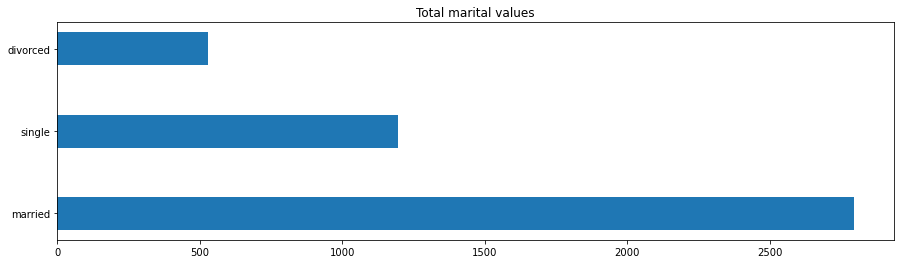

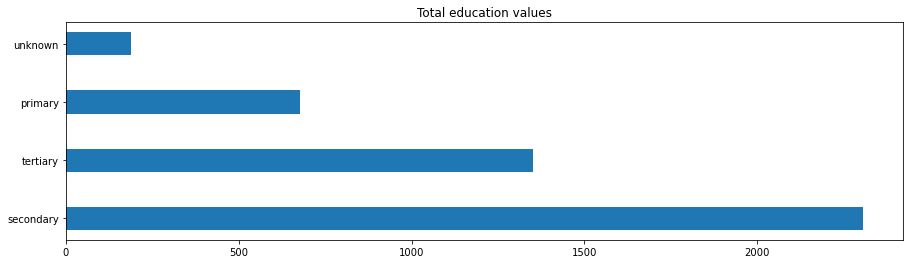

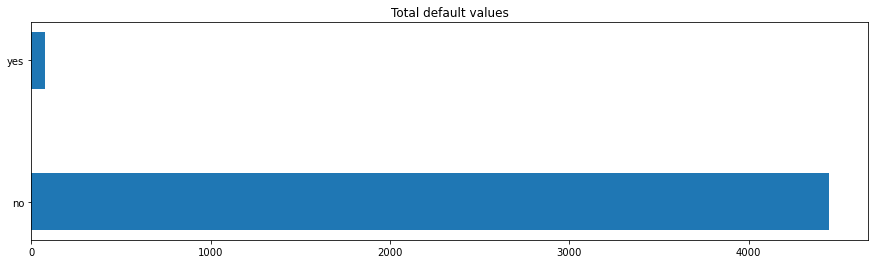

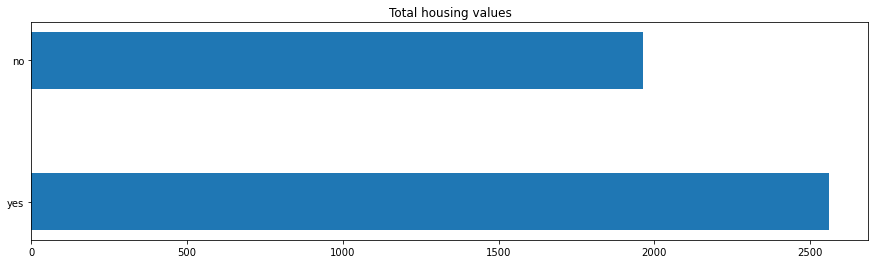

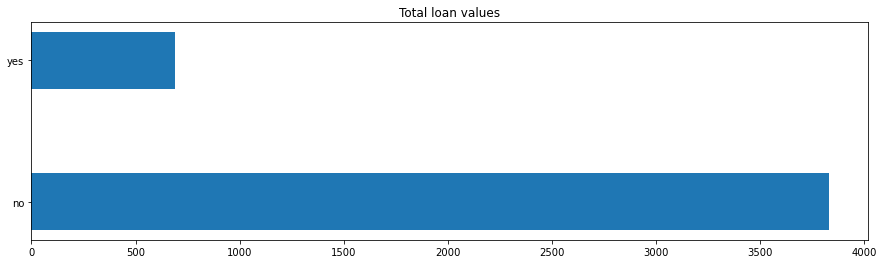

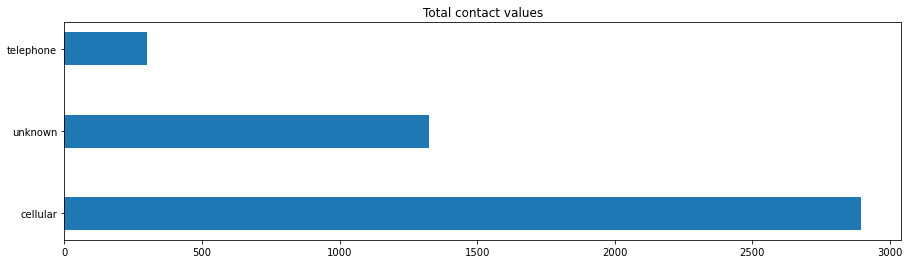

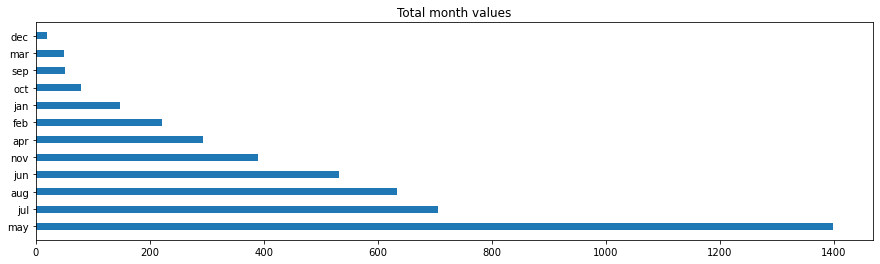

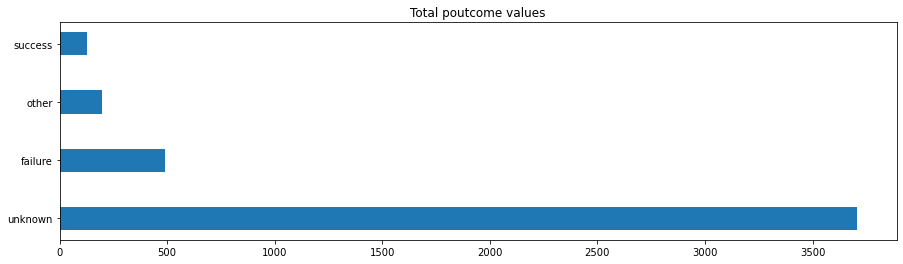

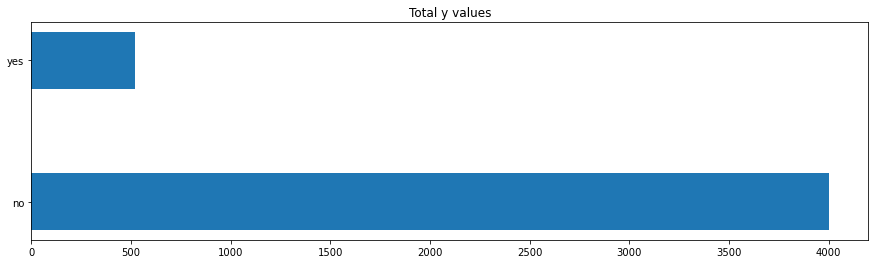

In [9]:
for col in categorical_cols:
    uvalues = df[col].value_counts()
    plt.figure(figsize=(15, 4))
    plt.barh(uvalues.index , uvalues, height=0.4)
plt.title(f"Total {col} values")
    plt.show()

In [10]:
# converting target value y to numerical values because we can't use one hot encoding on it
df["y"] = df["y"].map(lambda x: 1 if x=="yes" else 0)

# we can combine day and month columns to represent day of the year since both represent last contact from the campaign
# because we are combining days with month we will add previous month days with current
months = {"jan":0, "feb":31, "mar":59, "apr":90, "may":120, "jun":151, "jul":181, "aug":212, "sep":243, "oct":273, "nov":304, "dec":334}
df["month"] = df["month"].map(lambda x: months[x])
df["day_of_year"] = df["day"] + df["month"]
df.drop(["month","day"], axis=1, inplace=True)

# duration column is in seconds we will convert it in minutes
df["duration"] = df["duration"] / 60

# Changing order of columns
df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,14]]
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,1.316667,1,-1,0,unknown,292,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,3.666667,1,339,4,failure,131,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,3.083333,1,330,1,failure,106,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3.316667,4,-1,0,unknown,154,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,3.766667,1,-1,0,unknown,125,0


In [11]:
from category_encoders.count import CountEncoder

categorical_cols.remove("month")
categorical_cols.remove("y")
col_to_transform = [col for col in categorical_cols if col != "day_of_year" and col != "y"]

CEnc = CountEncoder(cols=col_to_transform, normalize=True)
transformed_data = CEnc.fit_transform(X=df)

transformed_data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year,y
0,30,0.028312,0.618668,0.149967,0.98319,1787,0.433975,0.847158,0.640566,1.316667,1,-1,0,0.819509,292,0
1,33,0.092236,0.618668,0.510064,0.98319,4789,0.566025,0.152842,0.640566,3.666667,1,339,4,0.108383,131,0
2,35,0.214333,0.264543,0.298607,0.98319,1350,0.566025,0.847158,0.640566,3.083333,1,330,1,0.108383,106,0
3,30,0.214333,0.618668,0.298607,0.98319,1476,0.566025,0.152842,0.292856,3.316667,4,-1,0,0.819509,154,0
4,59,0.209246,0.618668,0.510064,0.98319,0,0.566025,0.847158,0.292856,3.766667,1,-1,0,0.819509,125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0.092236,0.618668,0.510064,0.98319,-333,0.566025,0.847158,0.640566,5.483333,5,-1,0,0.819509,211,0
4517,57,0.040478,0.618668,0.298607,0.01681,-3313,0.566025,0.152842,0.292856,2.550000,1,-1,0,0.819509,129,0
4518,57,0.169874,0.618668,0.510064,0.98319,295,0.433975,0.847158,0.640566,2.516667,11,-1,0,0.819509,231,0
4519,28,0.209246,0.618668,0.510064,0.98319,1137,0.433975,0.847158,0.640566,2.150000,4,211,3,0.043574,37,0


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(transformed_data.iloc[:,:-1], transformed_data.iloc[:,-1], 
                                                    test_size=0.2, stratify=transformed_data.iloc[:,-1])

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
res = RF.predict(X_test)
print(classification_report(Y_test, res))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       801
           1       0.76      0.28      0.41       104

    accuracy                           0.91       905
   macro avg       0.84      0.63      0.68       905
weighted avg       0.90      0.91      0.89       905



Text(0.5, 1.0, 'Feature Importance of columns')

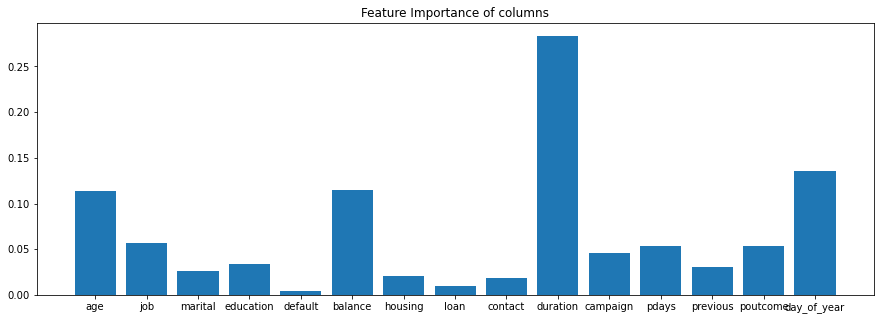

In [14]:
plt.figure(figsize=(15,5))
plt.bar(X_train.columns, RF.feature_importances_)
plt.title("Feature Importance of columns")

In [15]:
X_train.drop(["default"], axis=1, inplace=True)
X_train.head()

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year
997,34,0.214333,0.264543,0.298607,673,0.566025,0.152842,0.640566,4.516667,1,184,1,0.108383,324
943,40,0.169874,0.618668,0.510064,109,0.433975,0.847158,0.292856,6.700000,22,-1,0,0.819509,171
3570,39,0.169874,0.618668,0.298607,209,0.433975,0.847158,0.292856,0.600000,2,-1,0,0.819509,204
2763,57,0.092236,0.618668,0.298607,10,0.433975,0.847158,0.066578,5.333333,3,-1,0,0.819509,189
2572,25,0.105729,0.618668,0.510064,242,0.566025,0.847158,0.640566,1.033333,12,-1,0,0.819509,211


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

RFC = RandomForestClassifier()
parameters = {"n_estimators":[70,80,90,100,110,120],
              "max_depth":[4,5,6,7]}

GB_RF = GridSearchCV(estimator=RFC, param_grid=parameters)
GB_RF.fit(X_train, Y_train)

print(f"Best Score for Random forest is {GB_RF.best_score_}")

Best Score for Random forest is 0.8935294926755463


In [17]:
X_test.drop(["default"], axis=1, inplace=True)
ypred_RF = GB_RF.predict(X_test)
print(f"Classification Report of Random forest \n{classification_report(Y_test, ypred_RF)}")

Classification Report of Random forest 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       801
           1       0.71      0.14      0.24       104

    accuracy                           0.90       905
   macro avg       0.81      0.57      0.59       905
weighted avg       0.88      0.90      0.86       905



In [18]:
from sklearn.linear_model import LogisticRegression
 
LR = LogisticRegression()
LR.fit(X_train, Y_train)
ypred_LR = LR.predict(X_test)
print(f"Classification Report of Logistic Regression Classifier \n\n{classification_report(Y_test, ypred_LR)}")

Classification Report of Logistic Regression Classifier 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       801
           1       0.54      0.19      0.28       104

    accuracy                           0.89       905
   macro avg       0.72      0.59      0.61       905
weighted avg       0.86      0.89      0.86       905



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
